In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from matplotlib import colors
warnings.filterwarnings("ignore")

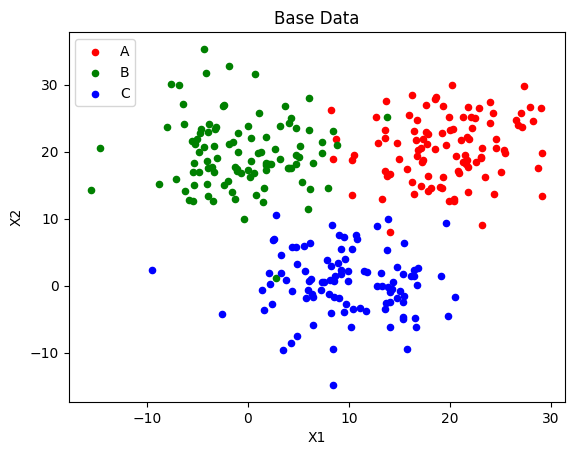

In [15]:
rng = np.random.default_rng(0)
A = pd.DataFrame(rng.normal(0,5,(100,2)) + (20,20), columns=['X1','X2'])
B = pd.DataFrame(rng.normal(0,5,(100,2)) + (0,20), columns=['X1','X2'])
C = pd.DataFrame(rng.normal(0,5,(100,2)) + (10,0), columns=['X1','X2'])

fig, ax = plt.subplots()
A.plot.scatter(x='X1', y='X2', label='A', ax=ax, color='red')
B.plot.scatter(x='X1', y='X2', label='B', ax=ax, color='green')
C.plot.scatter(x='X1', y='X2', label='C', ax=ax, color='blue')
plt.title('Base Data')
plt.show()

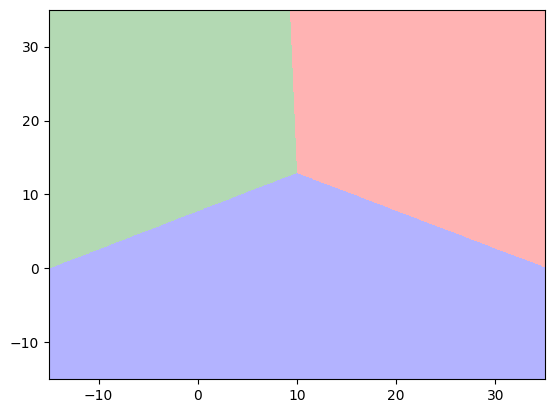

In [43]:
X = pd.concat([A,B,C])
model = KMeans(n_clusters=3, random_state=0).fit(X)

# Grab all the x & y points, see what the boundaries are for the different groups
# Meshgrid takes two 1D arrays and builds every combination of the values -> 1000x1000
# based on graph above, len is -15 to 35
x_grid, y_grid = np.meshgrid(np.linspace(-15,35,1000), np.linspace(-15,35,1000))
print(x_grid)
print("\n\n\n")
print(y_grid)

# For prediction, we are going to need a 2D array
# ravel take the arrays and break them down to 1D -> 1000000 x 2
# transpose -> 2 x 1000000
bound = np.vstack([x_grid.ravel(), y_grid.ravel()]).T
z = model.predict(bound)
z = z.reshape(x_grid.shape)
print(z)

# cmap provide the color reference to pick and plot
# Color in mathplotlib is just rgb palettes
# create color map
cmap = colors.ListedColormap(['green', 'blue', 'red'])
# plot regions
plt.imshow(z, interpolation='nearest', extent=(-15,35,-15,35), cmap=cmap, alpha=.3, aspect='auto', origin='lower')
plt.show()

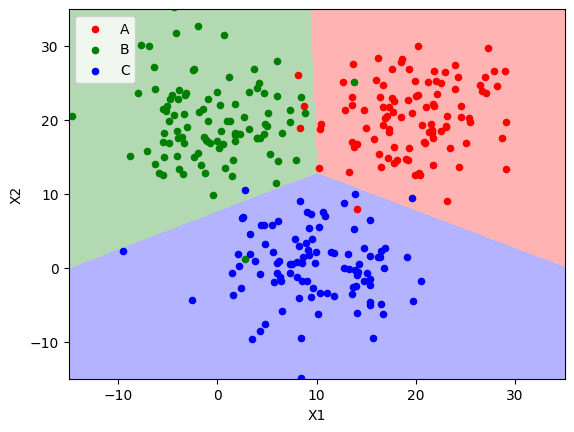

In [45]:
# Combine 2 plots
fig, ax = plt.subplots()

A.plot.scatter(x='X1', y='X2', label='A', ax=ax, color='red')
B.plot.scatter(x='X1', y='X2', label='B', ax=ax, color='green')
C.plot.scatter(x='X1', y='X2', label='C', ax=ax, color='blue')

ax.imshow(z, interpolation='nearest', extent=(-15,35,-15,35), cmap=cmap, alpha=.3, aspect='auto', origin='lower')
plt.show()

In [48]:
# manual group finding
centroids = [[-10,20], [15,7.5], [20,20]]
def find_groups(centroids, X):
    distance = [((X-c)**2).sum(axis=1)**.5 for c in centroids]
    distance = np.vstack(distance)
    groups = distance.argmin(axis=0)
    return groups
# test one point
# print(find_groups(centroids, np.array([[-10.1,20.1]])))
# find all the labels in the grid
z = find_groups(centroids, bound)
z = z.reshape(x_grid.shape)
print(z)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


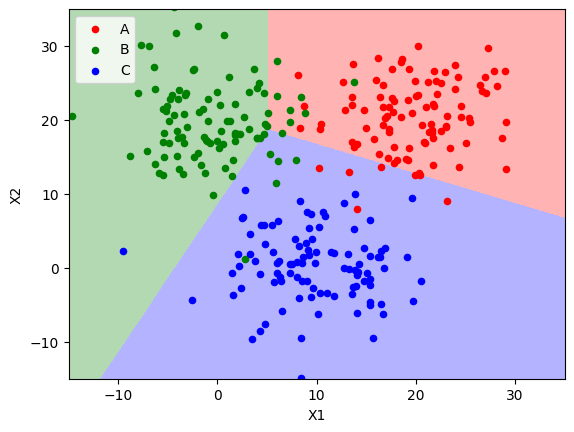

In [49]:
fig, ax = plt.subplots()

A.plot.scatter(x='X1', y='X2', label='A', ax=ax, color='red')
B.plot.scatter(x='X1', y='X2', label='B', ax=ax, color='green')
C.plot.scatter(x='X1', y='X2', label='C', ax=ax, color='blue')

ax.imshow(z, interpolation='nearest', extent=(-15,35,-15,35), cmap=cmap, alpha=.3, aspect='auto', origin='lower')
plt.show()

In [50]:
# prepare functions for iteration
def find_groups(centroids, X):
    distance = [((X-c)**2).sum(axis=1)**.5 for c in centroids]
    distance = np.vstack(distance)
    groups = distance.argmin(axis=0)
    return groups
def compute_centroids(X, centroids, groups):
    centroids = [X[groups == l].mean(axis=0) for l in list(range(len(centroids)))]
    centroids = np.vstack(centroids)
    return centroids
def plot_clusters(A, B, C, x_grid, y_grid, centroids):
    z = find_groups(centroids, np.vstack([x_grid.ravel(), y_grid.ravel()]).T)
    z = z.reshape(x_grid.shape)
    
    fig, ax = plt.subplots()

    A.plot.scatter(x='X1', y='X2', label='A', ax=ax, color='red')
    B.plot.scatter(x='X1', y='X2', label='B', ax=ax, color='green')
    C.plot.scatter(x='X1', y='X2', label='C', ax=ax, color='blue')

    ax.imshow(z, interpolation='nearest', extent=(-15,35,-15,35), cmap=cmap, alpha=.3, aspect='auto', origin='lower')
    plt.show()

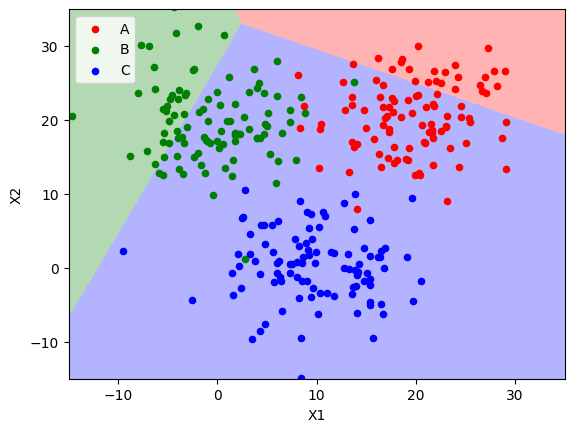

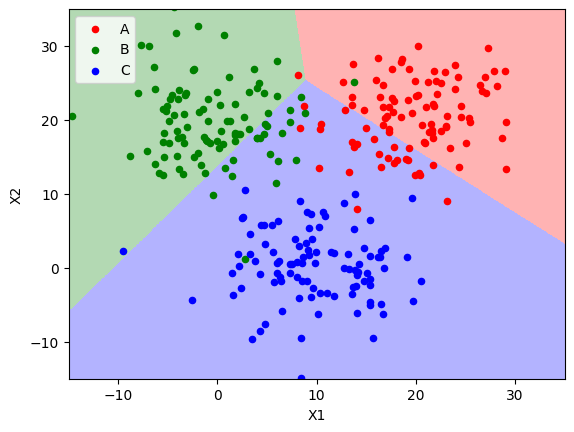

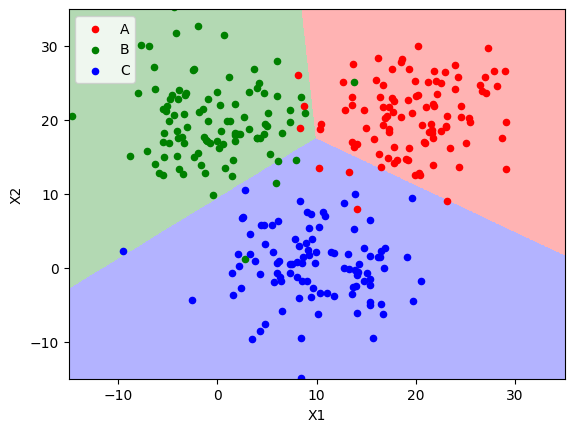

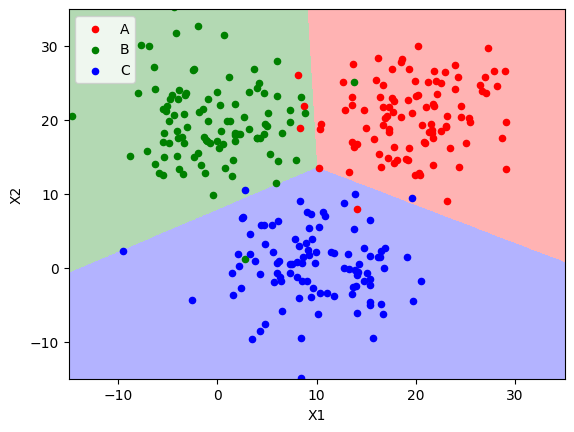

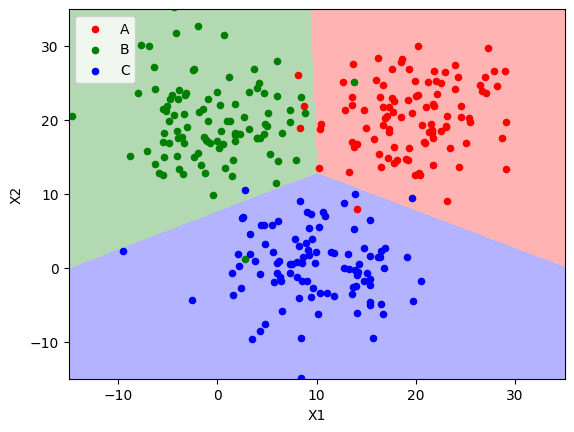

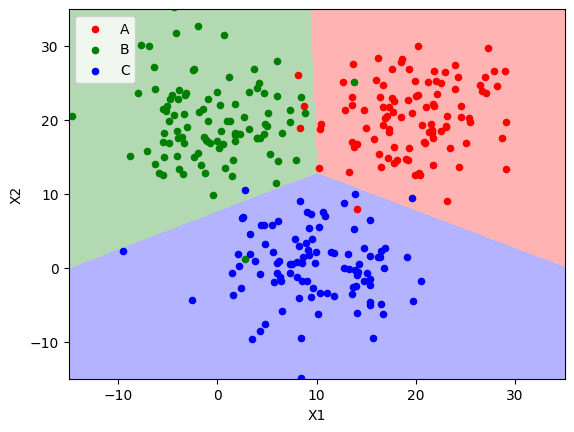

Converged after 5 iterations.


In [53]:
max_iter = 1000
labels = np.ones(len(X)) * -1
centroids = [[-25,25],[15,7.5],[30,40]]
plot_clusters(A, B, C, x_grid, y_grid, centroids)
num_iter = 0
for _ in range(max_iter):
    num_iter += 1
    
    old_labels = labels.copy()
    
    labels = find_groups(centroids, X)
    centroids = compute_centroids(X, centroids, labels)
    
    plot_clusters(A, B, C, x_grid, y_grid, centroids)
    
    if(labels == old_labels).all():
        break
print("Converged after {} iterations.".format(num_iter))